In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv("../../Data/cleaned_alzheimer.csv")

# Feature selection (using chi2 selection)
selected_features = ["MMSE", "M/F", "EDUC", "SES"]
X = df[selected_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Reduce demensionality using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_scaled)
X = pd.DataFrame(X, columns=['PC1', 'PC2']).reset_index(drop=True)
X

,PC1,PC2
0,0.163704,-0.962012
1,0.376844,-0.480838
2,0.573452,0.709306
3,0.502405,0.548915
4,-1.438725,-0.478589
...,...,...
312,1.305727,-1.002251
313,1.163634,-1.323034
314,0.146856,1.103262
315,0.146856,1.103262


<Axes: >

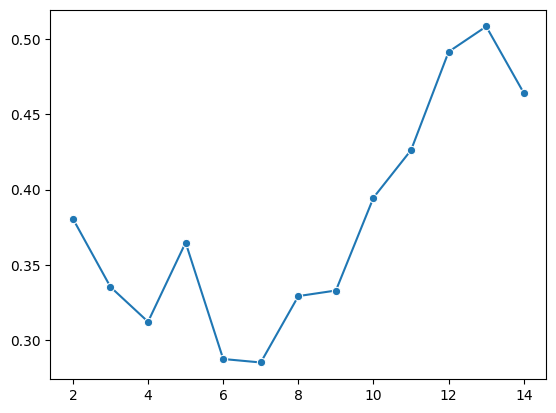

In [3]:
silhouette_scores = []
num_clusters = 15

# Run with different number of components
for i in range(2, num_clusters):
	gmm = GaussianMixture(n_components=i, random_state=0)
	gmm_labels = gmm.fit_predict(X)
	# Calculate silhouette score for GMM
	gmm_silhouette = silhouette_score(X, gmm_labels)
	silhouette_scores.append(gmm_silhouette)
	# print(f"GMM Silhouette Score: {gmm_silhouette}")

sns.lineplot(x = range(2, num_clusters), y = silhouette_scores, marker = 'o')

<Axes: xlabel='PC1', ylabel='PC2'>

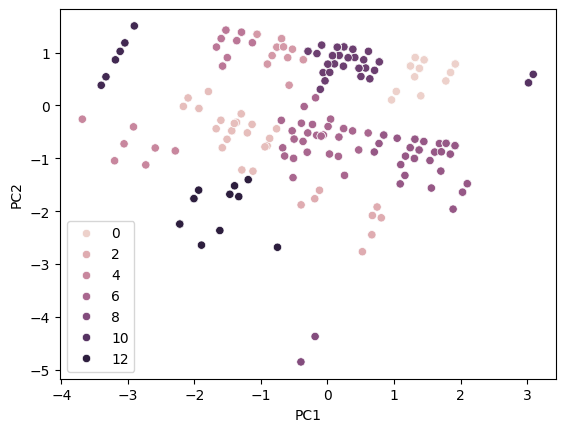

In [4]:
gmm = GaussianMixture(n_components=13, random_state=0, covariance_type='tied')
gmm_labels = gmm.fit_predict(X)

# Calculate silhouette score for GMM
gmm_silhouette = silhouette_score(X, gmm_labels)
silhouette_scores.append(gmm_silhouette)

# plot clusters
sns.scatterplot(x=X['PC1'], y=X['PC2'], hue = gmm_labels)

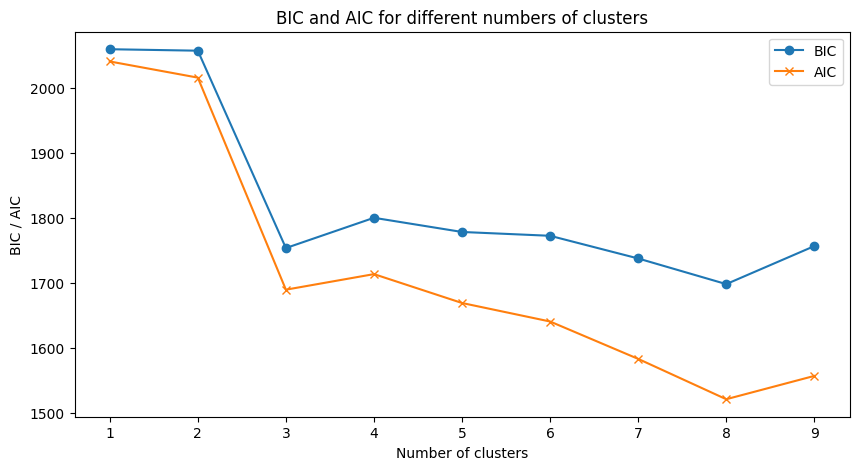

In [5]:
# Range of potential cluster numbers
n_components_range = range(1, 10)

# Lists to store BIC and AIC values for each model
bics = []
aics = []

# Fit a GMM for each number of clusters and compute BIC/AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    
    # Append BIC and AIC values
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

# Plot BIC and AIC values to find the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('BIC / AIC')
plt.title('BIC and AIC for different numbers of clusters')
plt.legend()
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

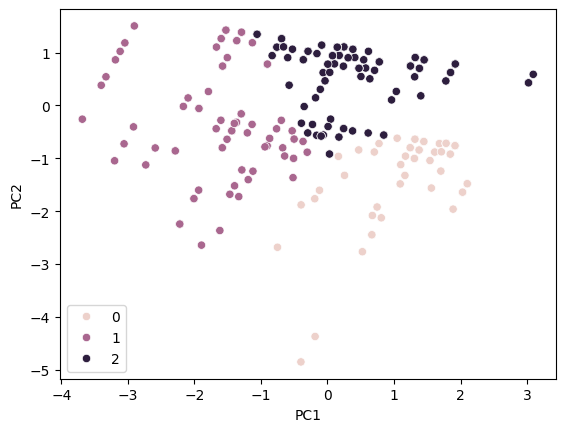

In [6]:
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='tied')
gmm_labels = gmm.fit_predict(X)

# Calculate silhouette score for GMM
gmm_silhouette = silhouette_score(X, gmm_labels)
silhouette_scores.append(gmm_silhouette)

# plot clusters
sns.scatterplot(x=X['PC1'], y=X['PC2'], hue = gmm_labels)

             MMSE       M/F      EDUC       SES     Group
cluster                                                  
0       -0.270569 -1.114700  0.901652 -1.016200  0.515625
1       -0.424257 -0.330622 -1.012429  1.089724  0.606061
2        0.385181  0.675794  0.276135 -0.278220  0.220779


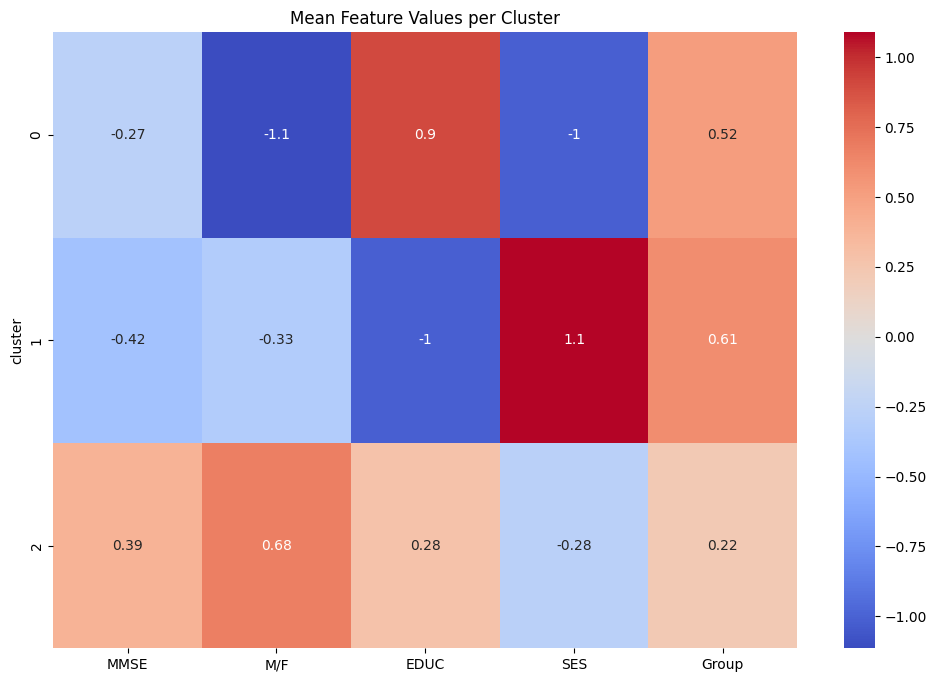

In [7]:
# X = df[selected_features]
X_scaled["Group"] = df["Group"]
X_scaled['cluster'] = gmm_labels

cluster_means = X_scaled.groupby('cluster').mean()

# Display the mean feature values for each cluster
print(cluster_means) 

# Visualize the differences between clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values per Cluster')
plt.show()